<a href="https://colab.research.google.com/github/alexey9019/data/blob/master/Copy_of_sem_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Повторение

## Python

#### Инкапсуляция

Инкапсуляция – скрытие реализации каких либо частей модуля или объекта от внешнего мира (от клиента). Это означает, что манипулируя модификаторами доступа, можно скрыть или открыть только определенные свойства, методы или классы для того, чтобы ненужные для класса-клиента данные не были доступны.

Инкапсуляция в Python работает лишь на уровне соглашения между программистами о том, какие атрибуты являются общедоступными, а какие — внутренними.

Одиночное подчеркивание в начале имени атрибута говорит о том, что переменная или метод не предназначен для использования вне методов класса, однако атрибут доступен по этому имени.

In [0]:
class Sber:
    def _secret(self):
        print('yeah')

obj = Sber()
obj._secret()

yeah


Двойное подчеркивание в начале имени атрибута даёт большую защиту: атрибут становится недоступным по этому имени.

In [0]:
class Sber:
    def __secret(self):
        print('top secret')

obj = Sber()
obj.__secret()

AttributeError: ignored

In [0]:
obj._Sber__secret()

top secret


#### Наследование

Наследование подразумевает то, что дочерний класс содержит все атрибуты родительского класса, при этом некоторые из них могут быть переопределены или добавлены в дочернем.

In [0]:
class Human:  
    # Конструктор
    def __init__(self, name, age, sex):
        self.name = name 
        self.age = age 
        self.sex = sex 
        
    # Метод (method):
    def showInfo(self):
        print(f'Человек: {self.name}, возраст {self.age}, пол {self.sex}')

class SuperMan(Human):
    def __init__(self, name, age, sex, height, weight):
        # Вызывается конструктор родительского класса (Human)
        # чтобы прикрепить значение к атрибутам 'name', 'age', 'sex' родительского класса
        super().__init__(name, age, sex)

        # Доопределяем передаваемые в конструктор SuperMan переменные
        self.height = height
        self.weight = weight

    def showInfo(self):
        print(f'Cупермен| имя: {self.name}, возраст {self.age}, пол {self.sex}, вес {self.weight}, рост {self.height}')

In [0]:
human_obj = Human('Петя', 25, 'муж.')
human_obj.showInfo()

Человек: Петя, возраст 25, пол муж.


In [0]:
superman_obj = SuperMan('Кларк ', 34, 'муж.', 191, 107)
superman_obj.showInfo()

Cупермен| имя: Кларк , возраст 34, пол муж., вес 107, рост 191


#### Полиморфизм

Полиморфизм – это возможность обработки разных типов данных, т.е. принадлежащих к разным классам, с помощью "одно и той же" функции, или метода. На самом деле одинаковым является только имя метода, его исходный код зависит от класса. Кроме того, результаты работы одноименных методов могут существенно различаться. Поэтому в данном контексте под полиморфизмом понимается множество форм одного и того же слова – имени метода.

In [0]:
superman_obj.showInfo()
human_obj.showInfo()

Cупермен| имя: Кларк , возраст 34, пол муж., вес 107, рост 191
Человек: Петя, возраст 25, пол муж.


Полиморфизм — это способность обьекта использовать методы производного класса, который не существует на момент создания базового.

## Повторение алгоритмов

#### Что Вас могут спросить?

* На каких основных принципах держится ООП
* Особенности релизации Python, его библиотек.
* Что вы будете делать, если дата-сет несбалансированный?
* Как вы будете решать проблему, если есть пропуски в данных?
* Как поступите, если будут выбросы в данных?
* Как предотвратить переобучение?
* Как оценивать алгоритм?
* Расписать формулы метрик
* Что дает bagging?
* Алгоритмы

### Линейные методы

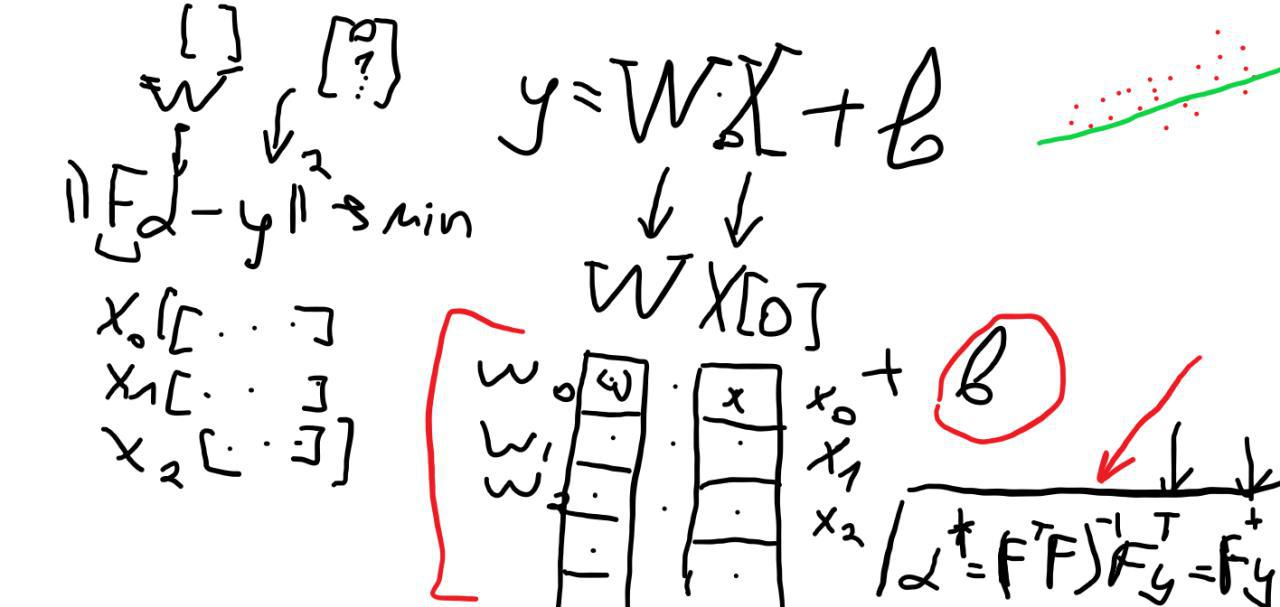

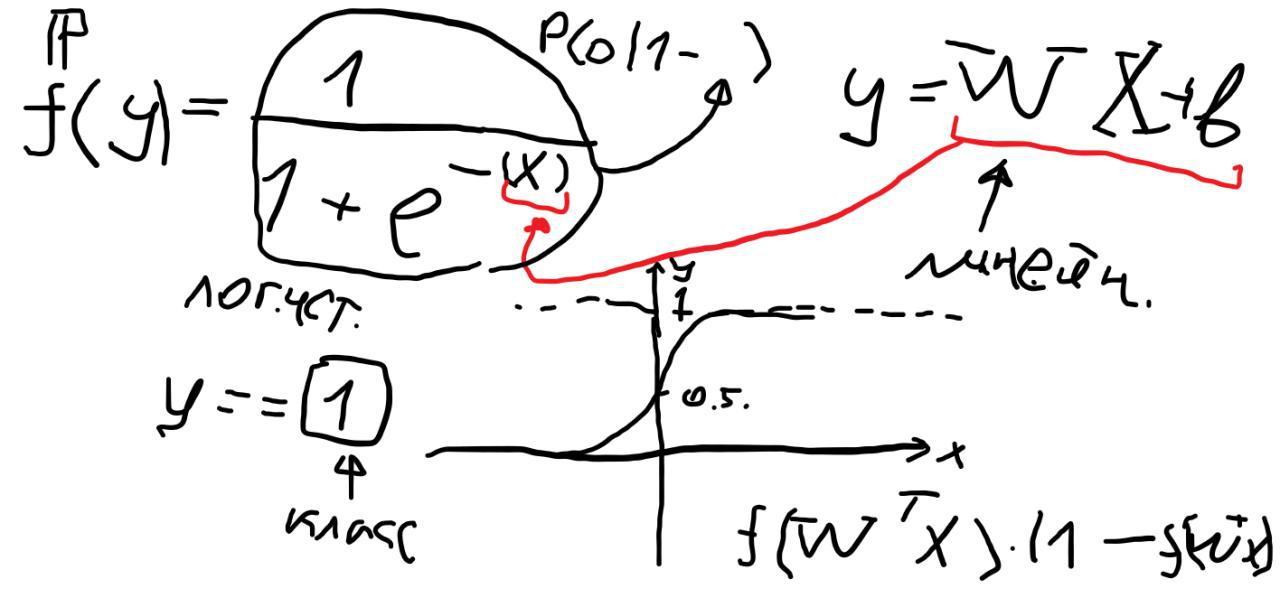

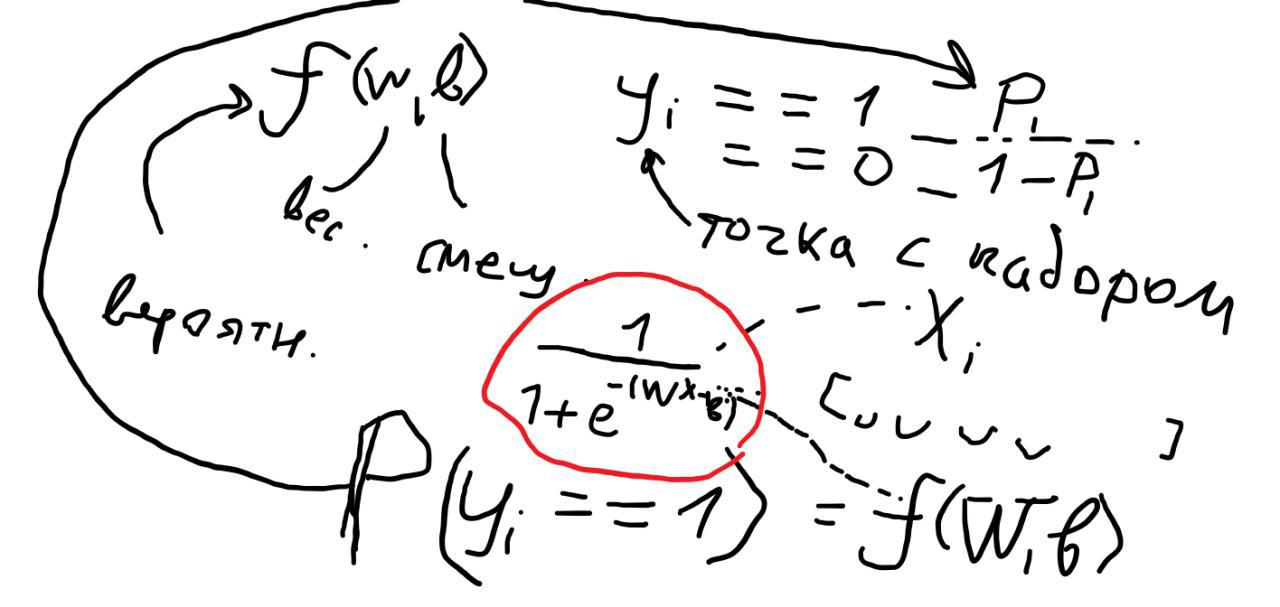

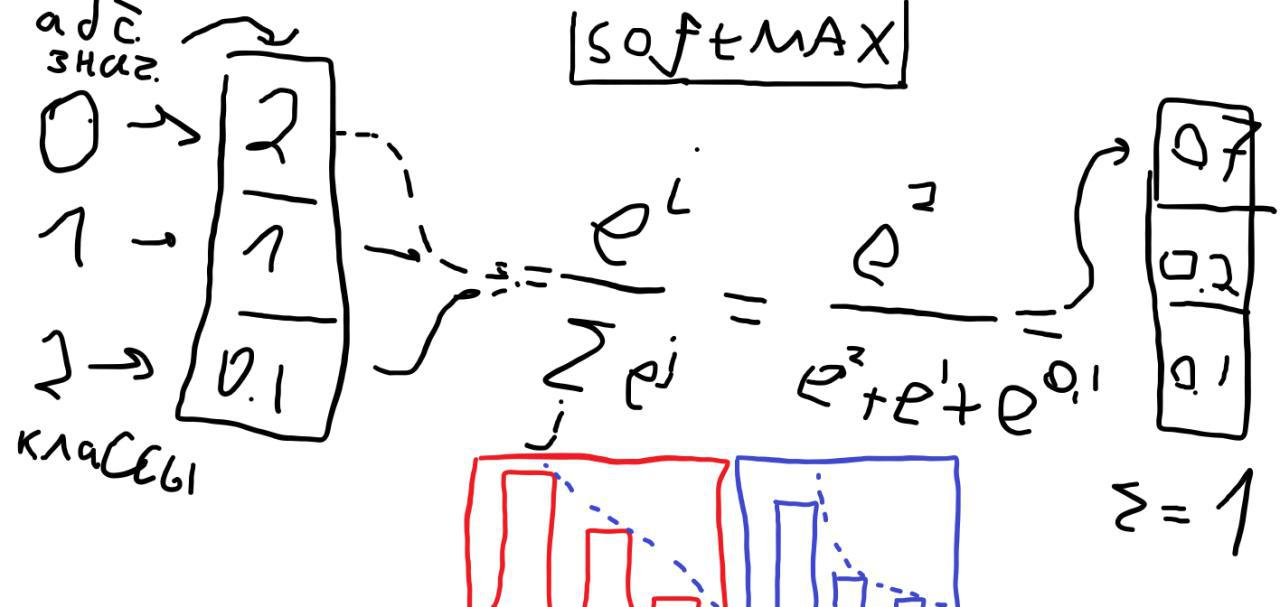

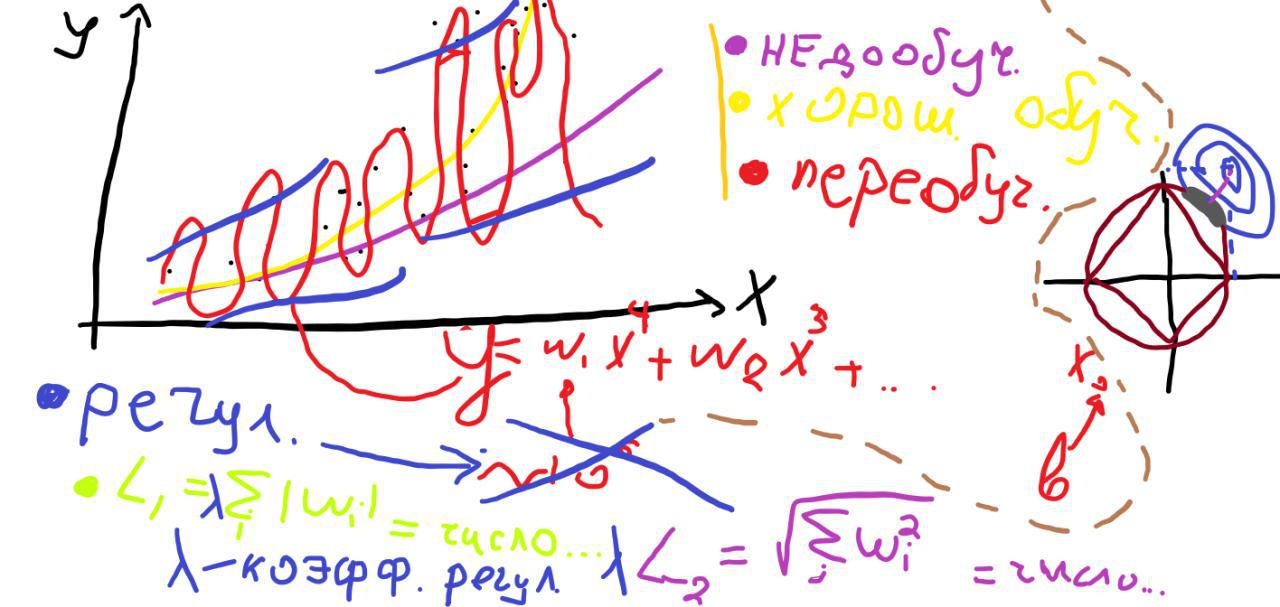

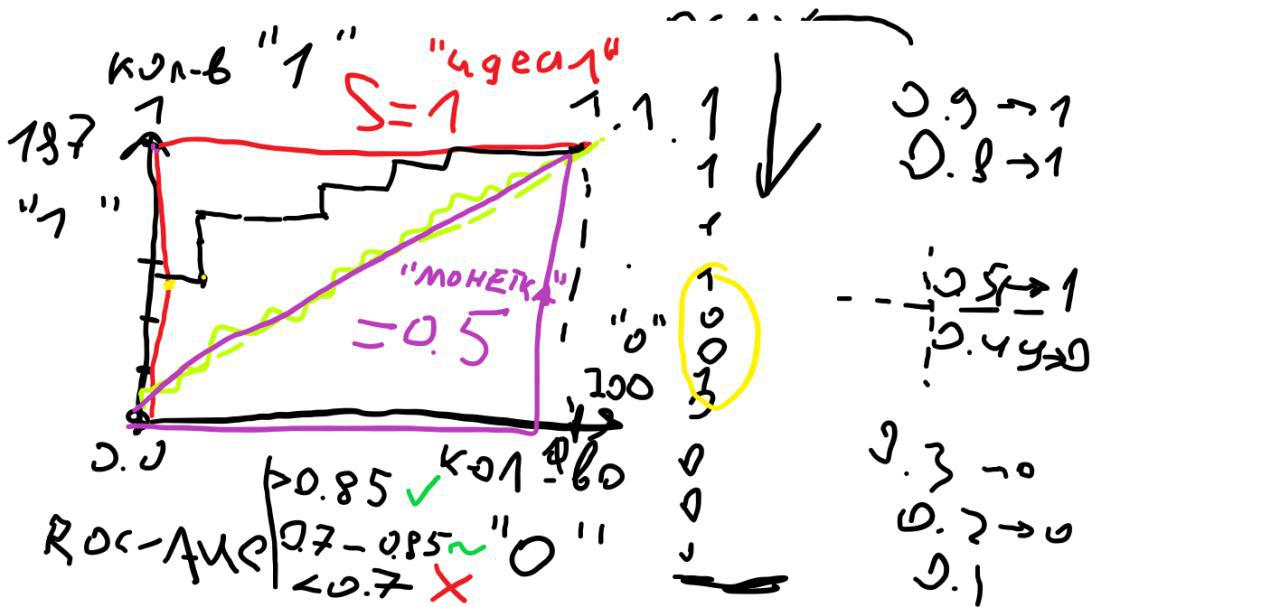

[0.         0.         0.         0.01851852 0.01851852 0.03703704
 0.03703704 0.05555556 0.05555556 0.07407407 0.07407407 0.09259259
 0.09259259 0.12962963 0.12962963 0.14814815 0.14814815 0.2037037
 0.2037037  0.27777778 0.27777778 1.        ] 
 [0.         0.04761905 0.14285714 0.14285714 0.19047619 0.19047619
 0.33333333 0.33333333 0.38095238 0.38095238 0.61904762 0.61904762
 0.66666667 0.66666667 0.76190476 0.76190476 0.9047619  0.9047619
 0.95238095 0.95238095 1.         1.        ]


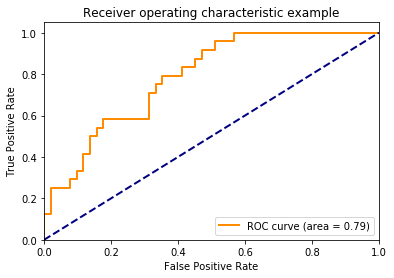

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(fpr[0], '\n', tpr[0])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

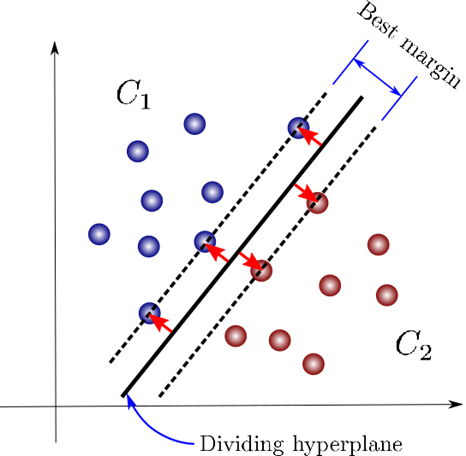

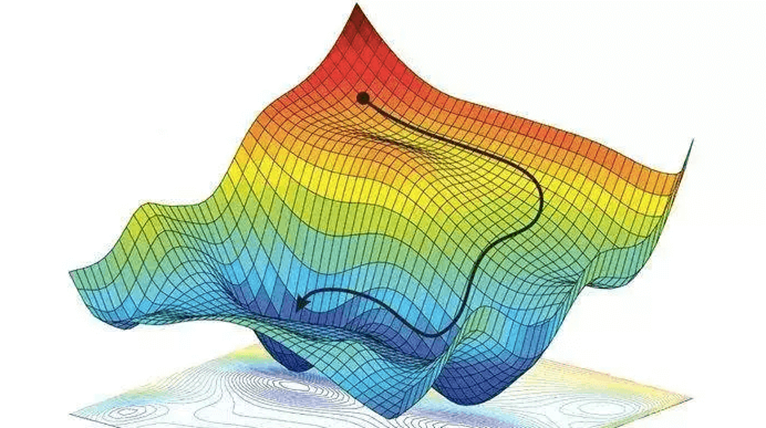

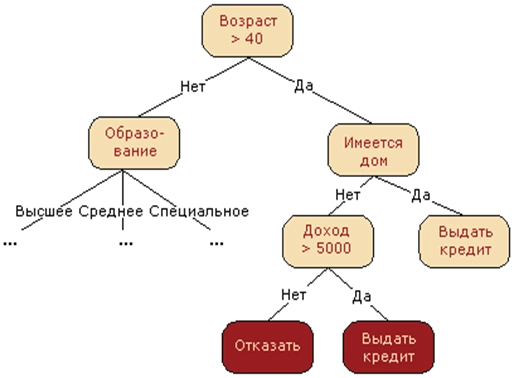

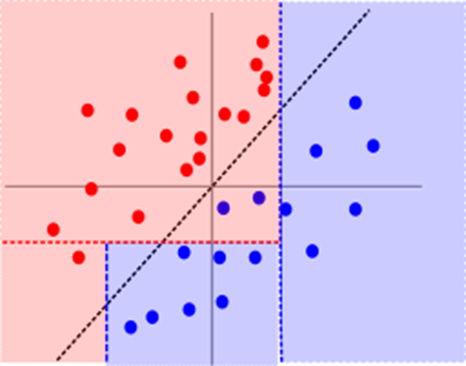

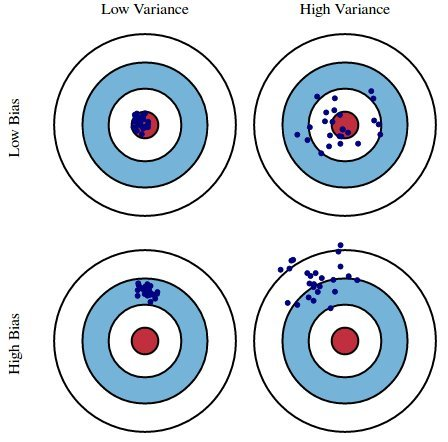

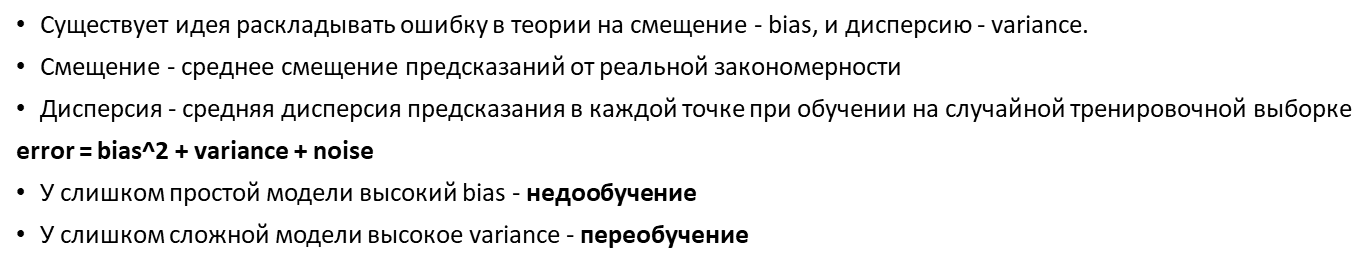

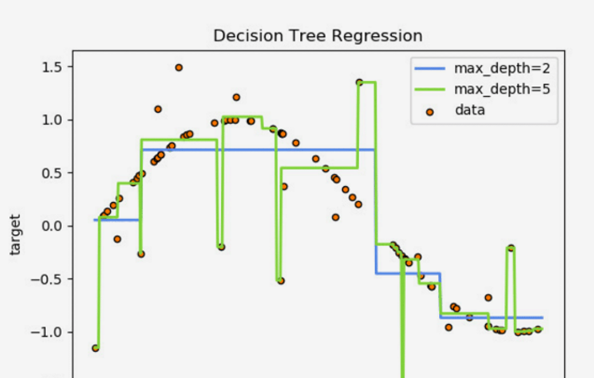

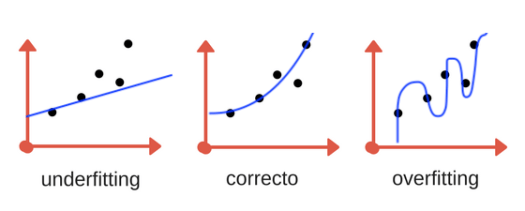

Бэггинг позволяет снизить дисперсию (variance) обучаемого классификатора, уменьшая величину, на сколько ошибка будет отличаться, если обучать модель на разных наборах данных, или другими словами, предотвращает переобучение. Эффективность бэггинга достигается благодаря тому, что базовые алгоритмы, обученные по различным подвыборкам, получаются достаточно различными, и их ошибки взаимно компенсируются при голосовании, а также за счёт того, что объекты-выбросы могут не попадать в некоторые обучающие подвыборки.

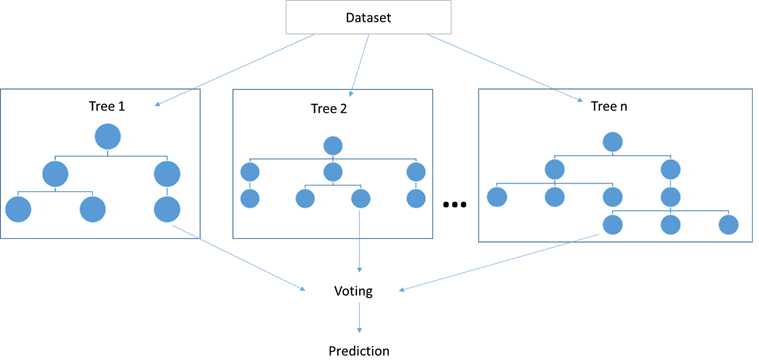

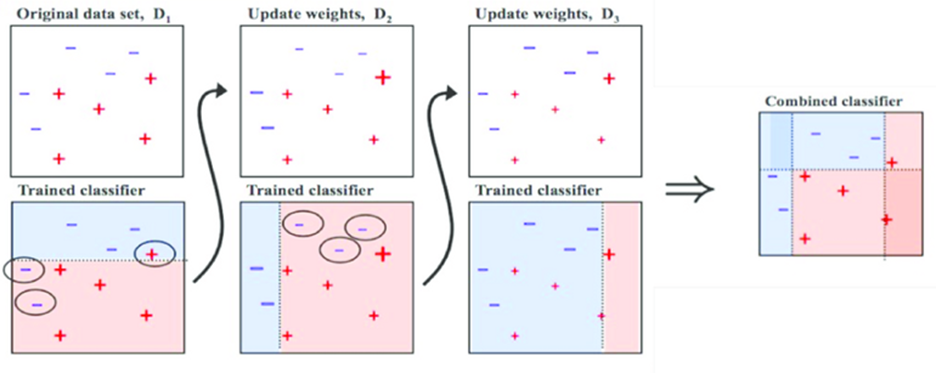

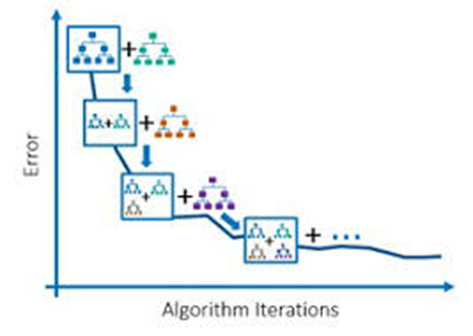

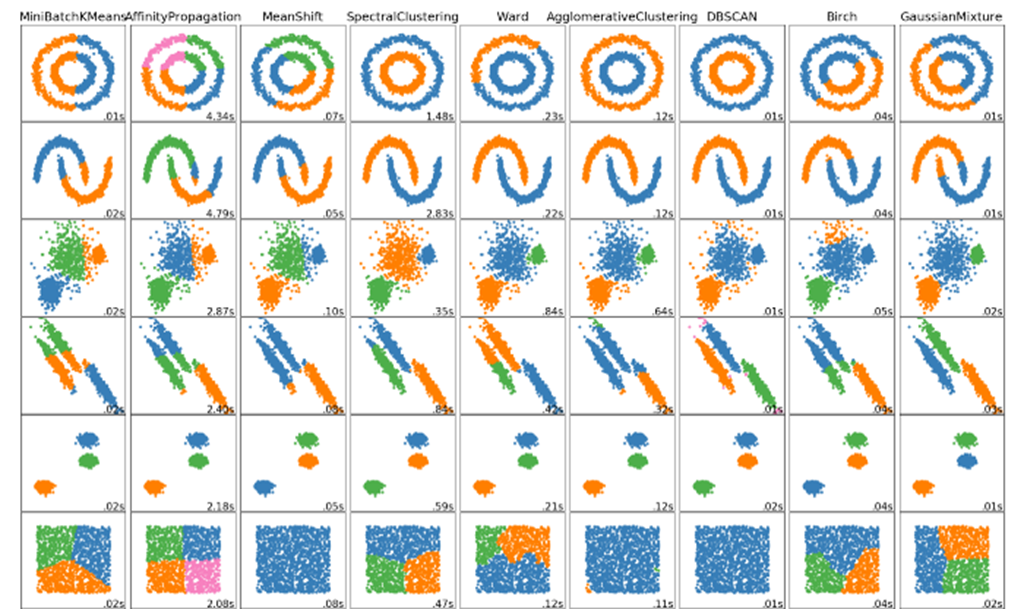